In [333]:
import numpy as np
import pandas as pd
import emcee
import corner
from scipy.stats import chi2
from scipy.optimize import minimize
import matplotlib.pyplot as plt
# This part calls for the tex package with Palantino font family 
# Note latex should be installed in the system to run this
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "monospace"
})

from math import *
import time

# Problem 1

In [90]:
def linear_congruential_generator(n,a,X,c,m):
    return_var = np.zeros(n)
    return_var[0] = ((a * X + c) % m) / m
    for i in range(n-1):
        return_var[i+1] = ((a * return_var[i] + c) % m) / m
    return return_var

a = 545445
c = 1344
m = 582
X = 1.0
t1_start = time.time()
random_array = linear_congruential_generator(10000,a,X,c,m)
t1_end = time.time()
t1 = t1_end - t1_start

print("Time:",t1,"s")
print("Random Numbers:",random_array)

Time: 0.011999845504760742 s
Random Numbers: [0.5        0.90463918 0.12871984 ... 0.23431875 0.91063405 0.74705998]


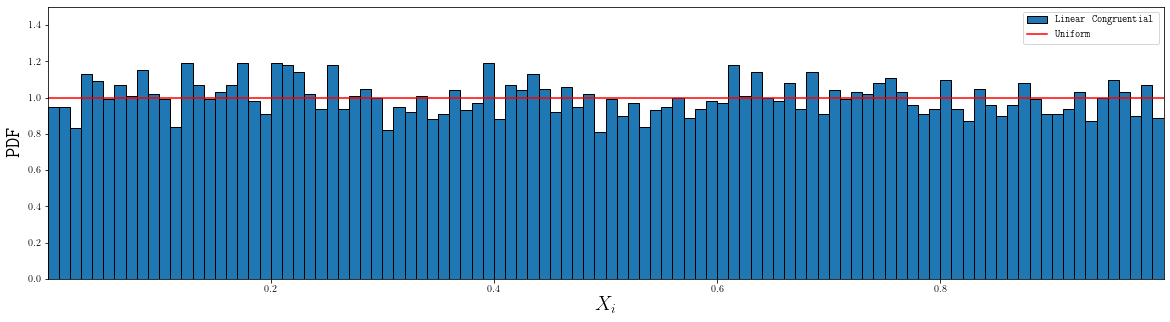

In [130]:
f1 = plt.figure(figsize=(20,5))
plt.xlabel("$X_i$",fontsize=20)
plt.ylabel("PDF",fontsize=20)
plt.margins(0)
plt.ylim([0,1.5])
plt.hist(random_array,100,density=True,edgecolor="black", label='Linear Congruential')
plt.axhline(y=1,color='red',label='Uniform')
plt.legend()
plt.show()

# Problem 2

In [27]:
t2_start = time.time()
numpy_random_array = np.random.rand(10000)
t2_end = time.time()
t2 = t2_end - t2_start

print("Time:",t2,"s")
print("Random Numbers:",numpy_random_array)

Time: 0.001001596450805664 s
Random Numbers: [0.67645929 0.61213779 0.98316341 ... 0.54811053 0.46716121 0.66226114]


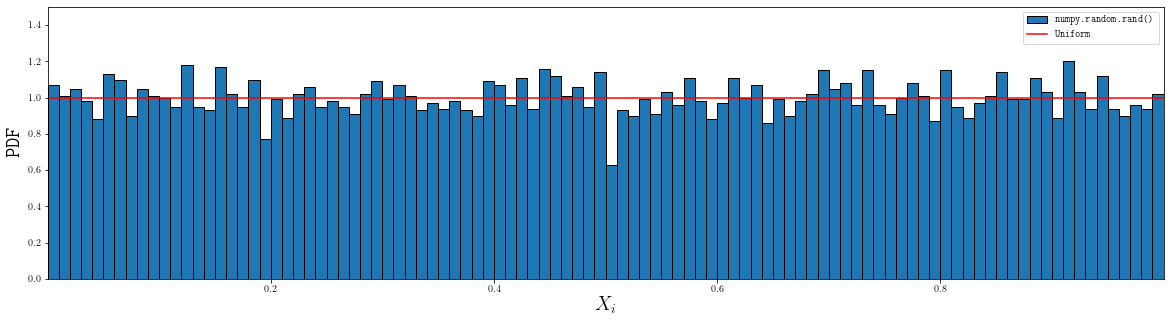

In [131]:
f1 = plt.figure(figsize=(20,5))
plt.xlabel("$X_i$",fontsize=20)
plt.ylabel("PDF",fontsize=20)
plt.margins(0)
plt.ylim([0,1.5])
plt.hist(numpy_random_array,100,density=True,edgecolor="black", label='numpy.random.rand()')
plt.axhline(y=1,color='red',label='Uniform')
plt.legend()
plt.show()

# Problem 3

In [132]:
print("Linear Congruential Genetaor took",t1,"seconds.")
print("np.random.rand() took",t2,"seconds.")

Linear Congruential Genetaor took 0.011999845504760742 seconds.
np.random.rand() took 0.001001596450805664 seconds.


# Problem 4

# Problem 5

In [166]:
def Box_Muller(n,mean,sigma):
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n):
        P1 = np.random.rand()
        P2 = np.random.rand()
        r = np.sqrt(-2 * sigma**2 * np.log(P1)) 
        theta = (2 * np.pi * sigma**2) * P2
        x[i] = r*np.cos(theta) + mean
        y[i] = r*np.sin(theta) + mean
    return x , y
        
def gaussian(x,mean,sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

In [167]:
BM_random_array_x, BM_random_array_y = Box_Muller(10000,0,1)
x = np.linspace(-5,5,1000)
gaussian_array = np.vectorize(gaussian)(x,0,1)

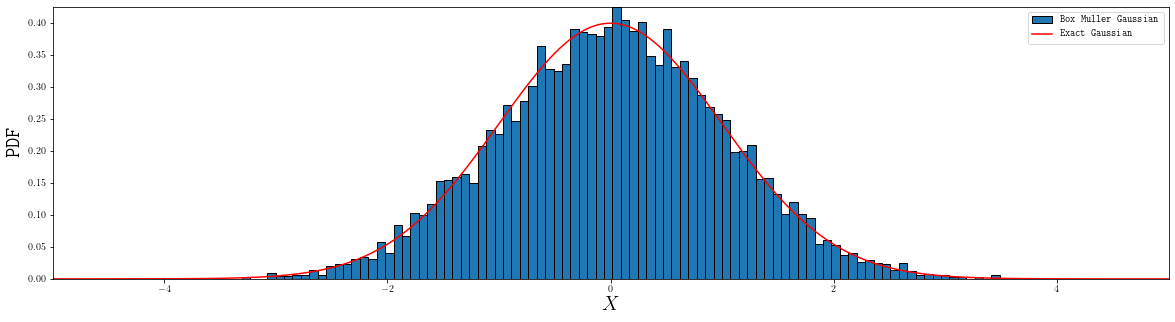

In [168]:
f5_1 = plt.figure(figsize=(20,5))
plt.xlabel("$X$",fontsize=20)
plt.ylabel("PDF",fontsize=20)
plt.margins(0)
plt.hist(BM_random_array_x,100,density=True,edgecolor="black", label='Box Muller Gaussian')
plt.plot(x,gaussian_array,color='red',label='Exact Gaussian')
plt.legend()
plt.show()

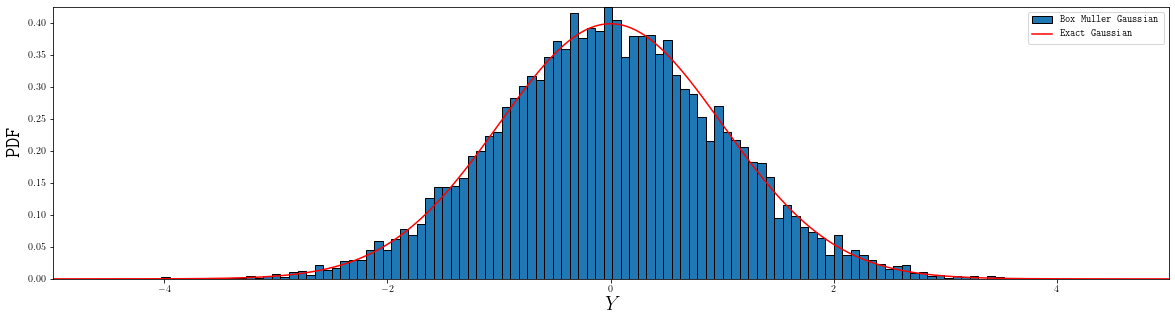

In [169]:
f5_2 = plt.figure(figsize=(20,5))
plt.xlabel("$Y$",fontsize=20)
plt.ylabel("PDF",fontsize=20)
plt.margins(0)
plt.hist(BM_random_array_y,100,density=True,edgecolor="black", label='Box Muller Gaussian')
plt.plot(x,gaussian_array,color='red',label='Exact Gaussian')
plt.legend()
plt.show()

# Problem 6

In [230]:
def func(x):
    return np.sqrt(2/np.pi)*np.exp(-x**2/2)

def rejection_method(n):
    return_var = np.zeros(n)
    i = 0
    while i != n:
        x = 5 * np.random.rand()
        y = np.sqrt(2/np.pi) * np.random.rand()
        if y < func(x):
            return_var[i] = x
            i += 1
    return return_var

In [231]:
rejection_random_array = rejection_method(10000)
x = np.linspace(0,5,1000)
true_array = np.vectorize(func)(x)

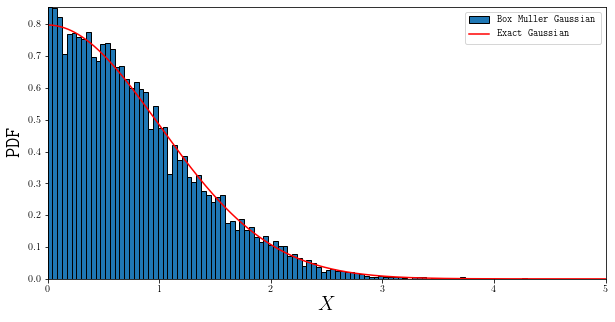

In [232]:
f6 = plt.figure(figsize=(10,5))
plt.xlabel("$X$",fontsize=20)
plt.ylabel("PDF",fontsize=20)
plt.margins(0)
plt.hist(rejection_random_array,100,density=True,edgecolor="black", label='Box Muller Gaussian')
plt.plot(x,true_array,color='red',label='Exact Gaussian')
plt.legend()
plt.show()

# Problem 7

In [208]:
def chi2test(obs, exp):
    chi2_var = np.sum((obs1 - exp)**2/exp)
    p = 1 - chi2.cdf(chi2_var, exp.shape[0]-1)
    if p < 0.01 or p > 0.99:
        s = 'not sufficiently random'
    elif 0.01 < p < 0.05 or 0.95 < p < 0.99:
        s = 'suspect'
    elif 0.05 < p < 0.1 or 0.9 < p < 0.95:
        s = 'almost suspect'
    else:
        s = 'sufficiently random'
    return s

In [209]:
# Observed count
obs1 = np.array([4,10,10,13,20,18,18,11,13,14,13])
obs2 = np.array([3,7,11,15,19,24,21,17,13,9,5])
# The expected probabilities
exp = np.array([4,8,12,16,20,24,20,16,12,8,4])

In [210]:
print('The first run is',chi2test(obs1, exp))
print('The second run is',chi2test(obs2, exp))

The first run is not sufficiently random
The second run is not sufficiently random


# Problem 8

In [247]:
def monte_carlo_circle(n, r=1, dim=2):
    n_points_total = 0
    n_points_inside = 0
    while n_points_inside != n:
        n_points_total += 1
        position_vector = np.random.uniform(low=-r, high=r, size=dim)
        if position_vector @ position_vector < r:
            n_points_inside += 1
    return ((2*r)**dim) * n_points_inside / n_points_total

In [248]:
sphere_2D = monte_carlo_circle(10000, r=1, dim=2)
sphere_10D = monte_carlo_circle(10000, r=1, dim=10)

In [249]:
print("Area of 2D circle is",sphere_2D)
print("Area of 10D sphere is",sphere_10D)

Area of 2D circle is 3.1325867334951836
Area of 10D sphere is 2.587955090891813


# Problem 9

In [321]:
def uniform(x,mean,sd):
    if np.abs(x-mean) < sd:
        return 1
    else:
        return 0
    
def metropolis_on_uniform(n,low,high):
    mean = (high+low)/2
    sd = (high-low)/2
    x = np.zeros(n+100)
    x[0] = mean + np.random.rand()
    i = 0
    while  i != n+99:
        x[i+1] = x[i]
        temp = x[i] + np.random.normal(0,sd)
        if uniform(temp,mean,sd)/uniform(mean,mean,sd) > np.random.rand():
            x[i+1] = temp
        i += 1
    return x[100:]

In [322]:
markov_chain = metropolis_on_uniform(10000,3,7)

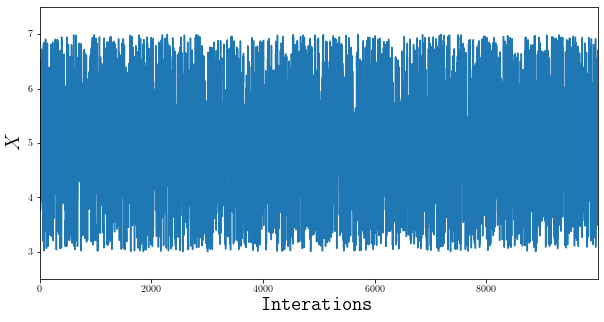

In [323]:
f9_1 = plt.figure(figsize=(10,5))
plt.xlabel("Interations",fontsize=20)
plt.ylabel("$X$",fontsize=20)
plt.margins(0)
plt.ylim([2.5,7.5])
plt.plot(np.arange(0,10000),markov_chain)
plt.show()

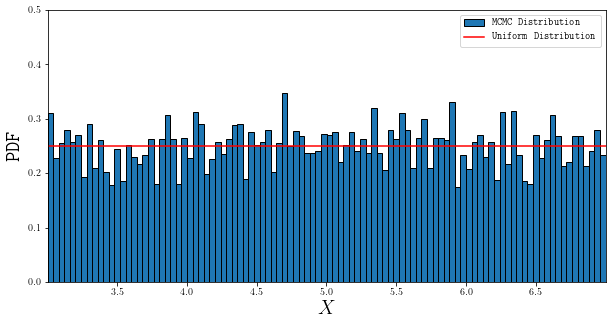

In [326]:
f9_2 = plt.figure(figsize=(10,5))
plt.xlabel("$X$",fontsize=20)
plt.ylabel("PDF",fontsize=20)
plt.margins(0)
plt.ylim([0,0.5])
plt.hist(markov_chain,100,density=True,edgecolor="black",label="MCMC Distribution")
plt.axhline(y=0.25,color='red',label='Uniform Distribution')
plt.legend()
plt.show()

# Problem 10

In [334]:
x = np.array([201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
y = np.array([592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
sigma = np.array([61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])

In [335]:
def model(param, x):
    return param[0] * x**2 + param[1] * x + param[2]

def log_likelihood(param, x, y, sigma):
    return -0.5 * np.sum((y - model(param, x))**2 / sigma**2
                        + np.log(2 * np.pi * sigma**2))

def log_prior(param):
    return 0

def log_posterior(param, x, y, sigma):
    return log_prior(param) + log_likelihood(param, x, y, sigma)

In [337]:
ndim = 3
nmarkov = 50
nsteps = 4000
initial_param = np.array([0.1,14.0,40.0])

nll = lambda *args: -log_likelihood(*args)
soln = minimize(nll,initial_param,args=(x,y,sigma))
pos = soln.x + 1e-4 * np.random.randn(nmarkov, ndim)

In [338]:
sampler = emcee.EnsembleSampler(nmarkov, ndim, log_posterior, args=(x, y, sigma))
sampler.run_mcmc(pos, nsteps, progress=True)
samples = sampler.get_chain()

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:07<00:00, 506.08it/s]


Text(0.5, 0, 'Step number')

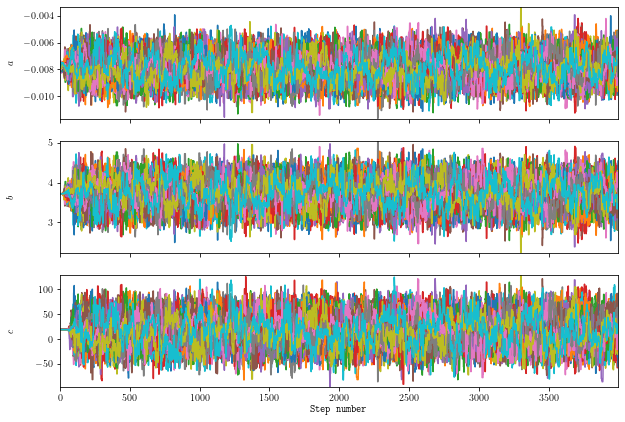

In [349]:
fig, axes = plt.subplots(3,figsize=(10,7),sharex=True)
labels = ['$a$','$b$','$c$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:,i])
    ax.margins(0)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.08,0.5)
axes[-1].set_xlabel('Step number')

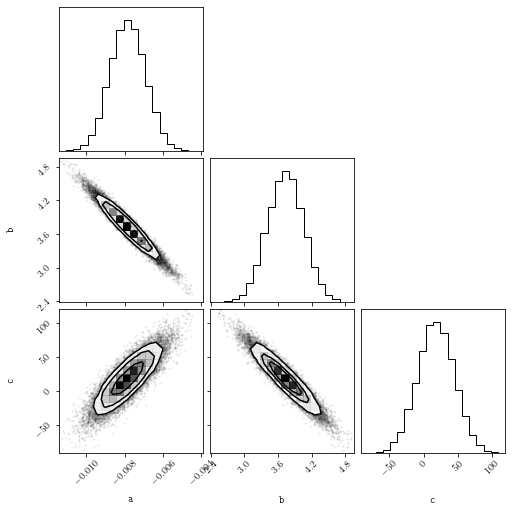

In [362]:
samples = sampler.get_chain(discard=100, thin=10, flat=True)
fig10_2 = corner.corner(samples, labels=["a","b","c"])
plt.show()

In [356]:
a_med ,b_med, c_med = np.median(samples, axis=0)
per = np.percentile(samples,[16,50,84],axis=0)
a_err_min,a_err_max = np.diff(per[:,0])
b_err_min,b_err_max = np.diff(per[:,1])
c_err_min,c_err_max = np.diff(per[:,2])
print("The median values of")
print(f"a: {a_med:.3f},  b: {b_med:.3f}, c:{c_med:.3f}")
print("The one sigma uncertainties of")
print(f"a:(-{a_err_min:.3f}, +{a_err_max:.3f}), b:(-{b_err_min:.3f}, +{b_err_max:.3f}), c:(-{c_err_min:.3f}, +{c_err_max:.3f})")

The median values of
a: -0.008,  b: 3.732, c:17.892
The one sigma uncertainties of
a:(-0.001, +0.001), b:(-0.325, +0.317), c:(-26.917, +26.950)


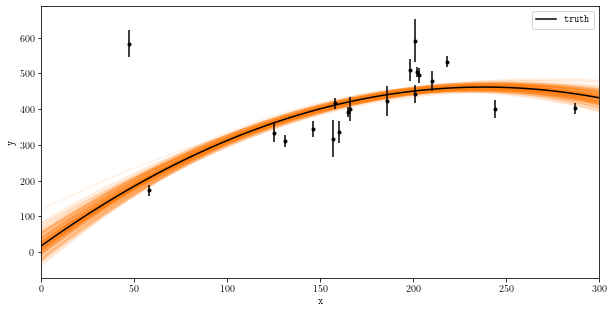

In [363]:
f10_3 = plt.figure(figsize=(10,5))
inds = np.random.randint(len(samples),size=200)
x0 = np.linspace(0,300,100)
for ind in inds:
    sample = samples[ind]
    plt.plot(x0,np.dot(np.vander(x0,3),sample[:3]),'C1',alpha=0.1)
plt.errorbar(x,y,yerr=sigma,fmt='.k',capsize=0)
plt.plot(x0,model([a_med,b_med,c_med],x0),'k',label='truth')
plt.legend()
plt.xlim(0,300)
plt.xlabel('x')
plt.ylabel('y')
plt.show()